## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv('bank-additional-full.csv', sep=';')

numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.describe())

print("Розмірність датасету:", data.shape)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [11]:
label_encoder = LabelEncoder()

bank_target = label_encoder.fit_transform(data['y'])

print(bank_target[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [13]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

for col in bank_client.columns:
    unique_values = bank_client[col].unique()
    print(f"Унікальні значення для атрибуту '{col}': {unique_values}\n")

Унікальні значення для атрибуту 'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Унікальні значення для атрибуту 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Унікальні значення для атрибуту 'marital': ['married' 'single' 'divorced' 'unknown']

Унікальні значення для атрибуту 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Унікальні значення для атрибуту 'default': ['no' 'unknown' 'yes']

Унікальні значення для атрибуту 'housing': ['no' 'yes' 'unknown']

Унікальні значення для атрибуту 'loan': ['no' 'yes' 'unknown']



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Максимальне значення віку: 98
Мінімальне значення віку: 17
Кількість NaN значень у стовпці 'age': 0


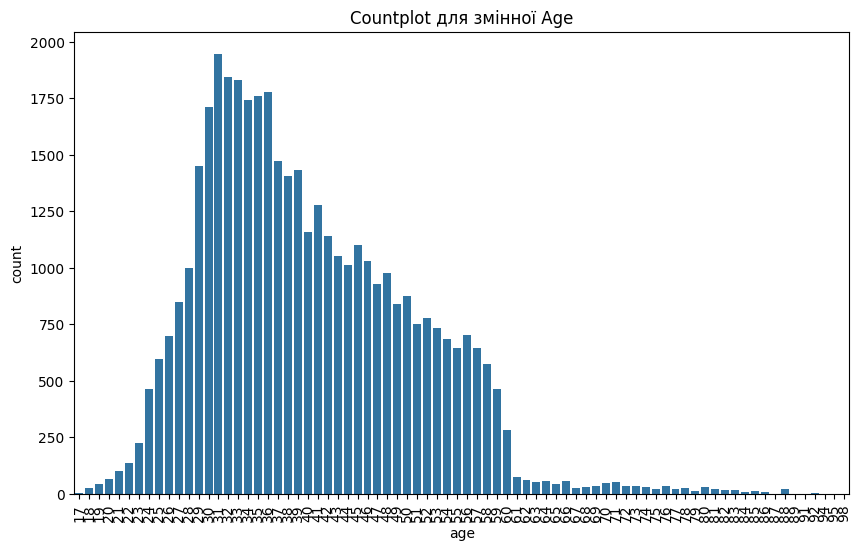

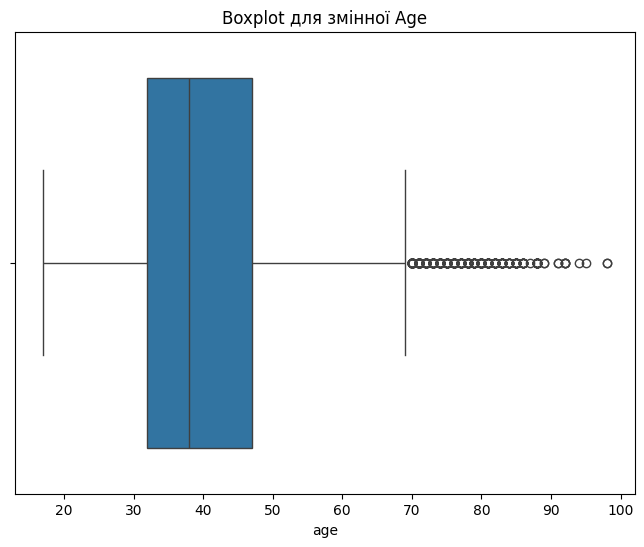

<Figure size 800x600 with 0 Axes>

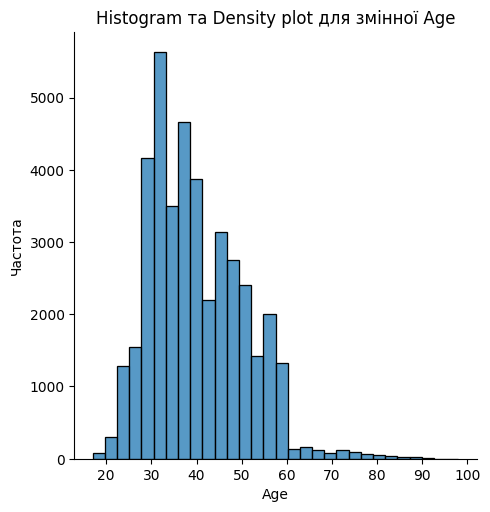

In [15]:
print("Максимальне значення віку:", data['age'].max())
print("Мінімальне значення віку:", data['age'].min())

print("Кількість NaN значень у стовпці 'age':", data['age'].isnull().sum())

plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=data)
plt.title('Countplot для змінної Age')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=data)
plt.title('Boxplot для змінної Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.displot(data['age'], bins=30, kde=False)
plt.title('Histogram та Density plot для змінної Age')
plt.xlabel('Age')
plt.ylabel('Частота')
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Опис вибірки "bank-additional-full"
- Вибірка "bank-additional-full", яка містить різні атрибути клієнтів банку та вихідну змінну, що вказує на те, чи підписав клієнт депозит. Було надано детальний опис кожного атрибуту та вихідної змінної.
2. Підготовка цільової змінної
- Визначив цільову змінну bank_target, яка відображає наявність або відсутність підписки на депозит клієнтом. Для цього використовувався LabelEncoder, щоб перетворити категоріальні значення "yes" та "no" у числові (1 та 0).  
3. Визначення змінних, що характеризують клієнтів банку
- Виділив атрибути, які характеризують клієнтів банку, та перевірено унікальні значення кожного атрибуту. Це допомагає краще зрозуміти розподіл даних та їх різноманітність.
4. Аналіз атрибуту Age
- Для атрибуту Age було проведено наступні аналізи:
- Виведено максимальне та мінімальне значення віку клієнтів.
- Перевірено наявність NaN значень.
- Побудовано візуальні аналізи, такі як countplot, boxplot, distplot, для розуміння розподілу та важких хвостів змінної Age.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [22]:
import numpy as np
import pandas as pd

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers
    """
    sorted_data = np.sort(df[column])
    # Calculate Q1, Q3 and IQR
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

In [23]:
label_encoder = LabelEncoder()

bank_target = label_encoder.fit_transform(data['y'])

print(bank_target[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. Значення квартилів та міжквартильного діапазону:
- Q1 (25th percentile) для змінної "age" складає 28.0, що означає, що 25% клієнтів молодші за 28 років.
- Q3 (75th percentile) для змінної "age" становить 55.0, що означає, що 75% клієнтів молодші за 55 років.
- Міжквартильний діапазон (IQR) складає 27.0, що є різницею між Q3 та Q1.

2. Викиди:
- Нижня межа викидів (Lower bound) становить -12.5, а верхня межа (Upper bound) -95.5.
- Знайдено два викиди у датасеті для змінної "age" з віком 98 років, які можуть бути аномальними значеннями.
3. Висновок:
- Наявність викидів у даних вказує на потенційні аномалії або нетипові дані.
- Викиди потребують додаткового розгляду або корекції, щоб забезпечити правильність та точність аналізу.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

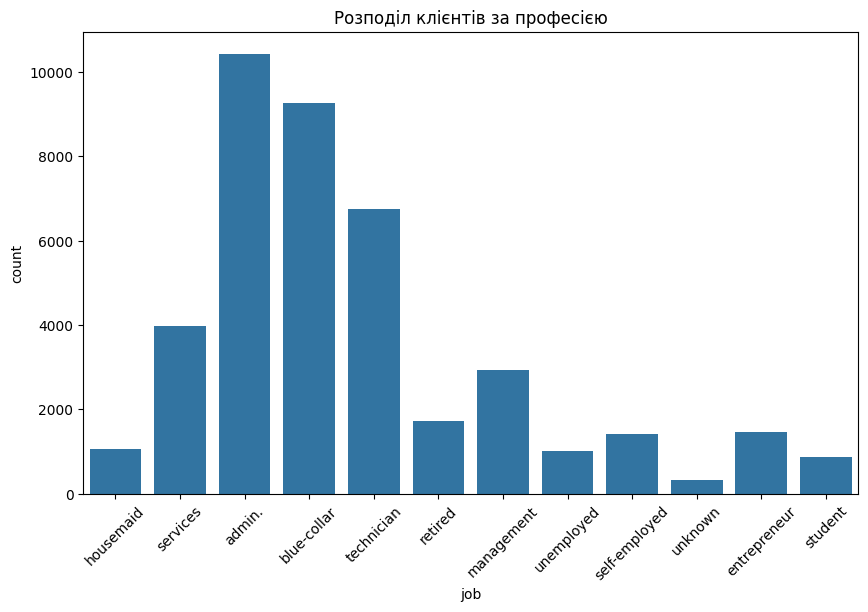

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=data)
plt.title('Розподіл клієнтів за професією')
plt.xticks(rotation=45)
plt.show()

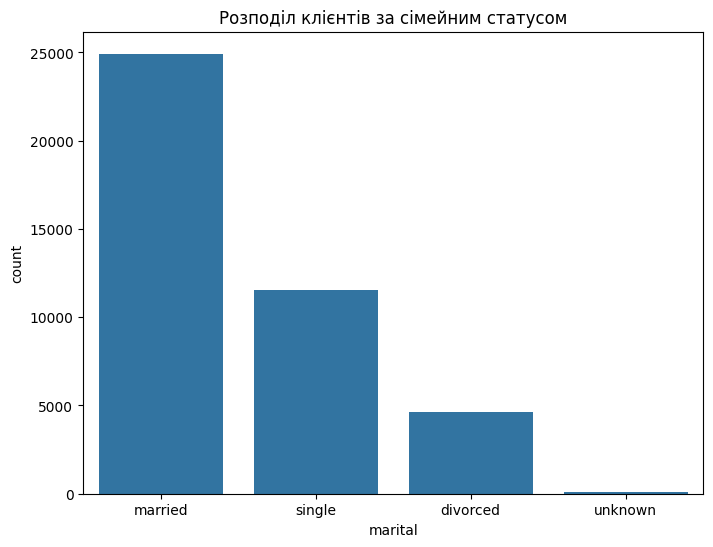

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=data)
plt.title('Розподіл клієнтів за сімейним статусом')
plt.show()

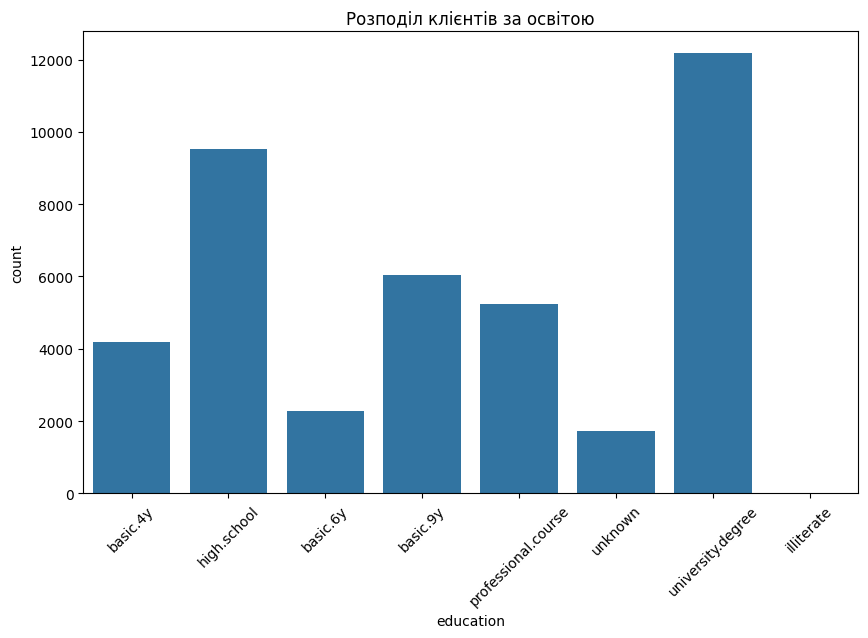

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=data)
plt.title('Розподіл клієнтів за освітою')
plt.xticks(rotation=45)
plt.show()

**Висновки з завдання 6 (детальні)**

1. Атрибут job:
- Найбільш поширені професії серед клієнтів банку це 'admin.', 'blue-collar' та 'technician'.
- Менш поширені професії включають 'housemaid', 'unemployed', 'self-employed', 'entrepreneur' та 'student'.
2. Розподіл клієнтів за сімейним статусом:
- Більшість клієнтів банку є одруженими ('married').
- Другою за поширеністю категорією є одинокі ('single') клієнти.
- Розподіл ще відображає деяку варіативність у статусах 'divorced' та 'unknown'.
3. Розподіл клієнтів за освітою:
- Найпоширенішим рівнем освіти серед клієнтів банку є 'university.degree', за яким йдуть 'high.school' та 'basic.9y'.
- Клієнти з освітою 'illiterate' та 'unknown' становлять меншість у вибірці.
- Більшість клієнтів мають середню або вищу освіту, проте є також значна кількість клієнтів з базовою освітою (наприклад, 'basic.4y', 'basic.6y', 'basic.9y').

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

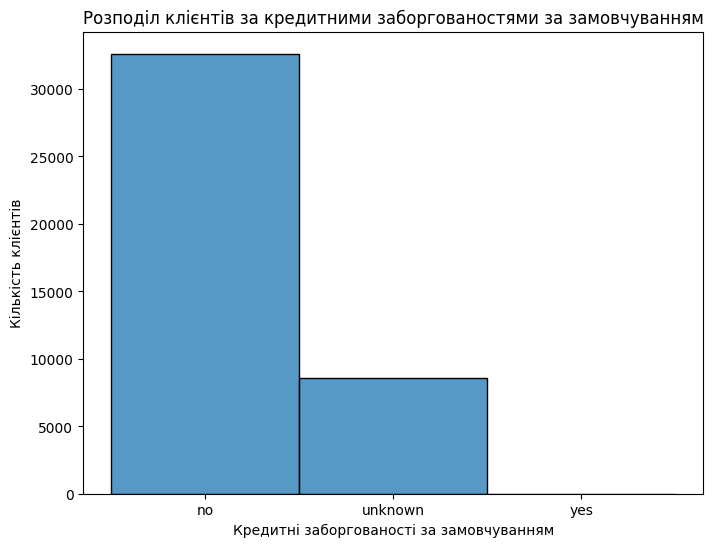

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='default', discrete=True)
plt.title('Розподіл клієнтів за кредитними заборгованостями за замовчуванням')
plt.xlabel('Кредитні заборгованості за замовчуванням')
plt.ylabel('Кількість клієнтів')
plt.show()

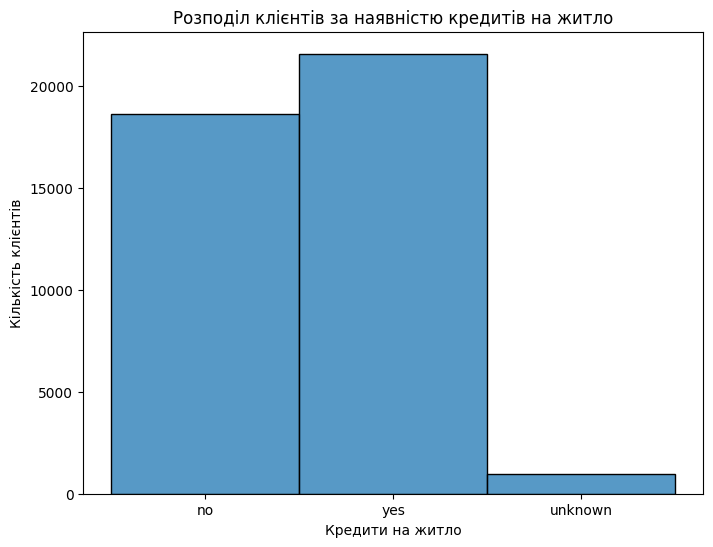

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='housing', discrete=True)
plt.title('Розподіл клієнтів за наявністю кредитів на житло')
plt.xlabel('Кредити на житло')
plt.ylabel('Кількість клієнтів')
plt.show()

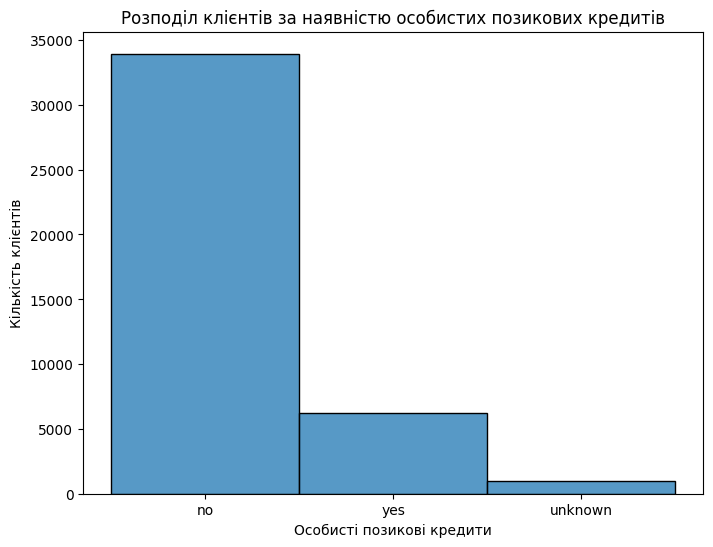

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='loan', discrete=True)
plt.title('Розподіл клієнтів за наявністю особистих позикових кредитів')
plt.xlabel('Особисті позикові кредити')
plt.ylabel('Кількість клієнтів')
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [52]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].apply(lambda x: le.fit_transform(not_null) if pd.notnull(x) else x)
      
    return df

In [54]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

KeyboardInterrupt: 

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [59]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  Q1 = dataframe[age_col].quantile(0.25)
  Q2 = dataframe[age_col].quantile(0.50)
  Q3 = dataframe[age_col].quantile(0.75)

  dataframe.loc[:, 'age_encoded'] = pd.cut(dataframe[age_col], bins=[0, Q1, Q2, Q3, np.inf], labels=[1, 2, 3, 4])
  
          
  return dataframe

In [60]:
bank_client = encode_age(bank_client, 'age')
print(bank_client[['age', 'age_encoded']].head())

    age age_encoded
0  56.0           4
1  57.0           4
2  37.0           2
3  40.0           3
4  56.0           4


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних
1. age_encoded=1: Вік належить до першого квартиля, тобто менше або дорівнює значенню Q1.
2. age_encoded=2: Вік належить до другого квартиля, тобто більше Q1 та менше Q2 (Q1 < age < Q2).
3. age_encoded=3: Вік належить до третього квартиля, тобто більше Q2 та менше Q3 (Q2 < age < Q3).
4. age_encoded=4: Вік належить до четвертого квартиля, тобто більше Q3.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [61]:
bank_relat_cols = ['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
bank_relat = data[bank_relat_cols].copy()

missing_values = bank_relat.isnull().sum()
print(missing_values)

contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [62]:
unique_contacts = bank_relat['contact'].unique()
unique_months = bank_relat['month'].unique()
unique_days_of_week = bank_relat['day_of_week'].unique()

print("Унікальні значення для 'contact':", unique_contacts)
print("Унікальні значення для 'month':", unique_months)
print("Унікальні значення для 'day_of_week':", unique_days_of_week)


Унікальні значення для 'contact': ['telephone' 'cellular']
Унікальні значення для 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Унікальні значення для 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



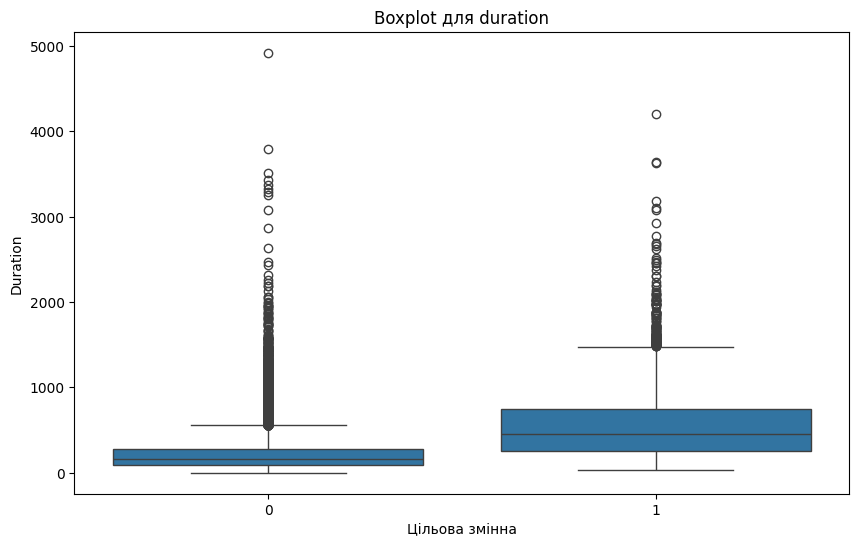

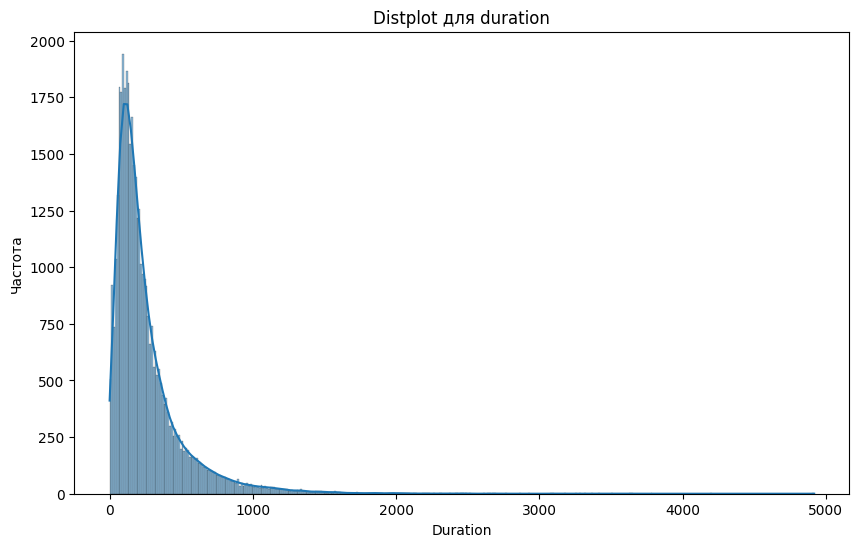

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=data)
plt.title('Boxplot для duration')
plt.xlabel('Цільова змінна')
plt.ylabel('Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], kde=True)
plt.title('Distplot для duration')
plt.xlabel('Duration')
plt.ylabel('Частота')
plt.show()

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [66]:
categorical_cols = ['contact', 'month', 'day_of_week']
bank_relat_encoded = pd.get_dummies(bank_relat, columns=categorical_cols)

print(bank_relat_encoded.head())

   duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0       261         1    999         0  nonexistent           1.1   
1       149         1    999         0  nonexistent           1.1   
2       226         1    999         0  nonexistent           1.1   
3       151         1    999         0  nonexistent           1.1   
4       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_mar  \
0          93.994          -36.4      4.857       5191.0  ...      False   
1          93.994          -36.4      4.857       5191.0  ...      False   
2          93.994          -36.4      4.857       5191.0  ...      False   
3          93.994          -36.4      4.857       5191.0  ...      False   
4          93.994          -36.4      4.857       5191.0  ...      False   

   month_may  month_nov  month_oct  month_sep  day_of_week_fri  \
0       True      False      False      False            False

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [74]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
    
  dataframe['duration_encoded'] = pd.qcut(dataframe[duration_col], q=[0, 0.25, 0.50, 0.75, 1], labels=[1, 2, 3, 4])
          
  return dataframe

In [75]:
bank_relat = encode_duration(bank_relat, 'duration')
print(bank_relat[['duration', 'duration_encoded']].head())

   duration duration_encoded
0       261                3
1       149                2
2       226                3
3       151                2
4       307                3


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [72]:
file_path = 'bank-additional-full.csv'
bank_data = pd.read_csv(file_path, delimiter=';')

bank_socec = bank_data[['job', 'marital', 'education', 'housing', 'loan']]

print(bank_socec.head())

         job  marital    education housing loan
0  housemaid  married     basic.4y      no   no
1   services  married  high.school      no   no
2   services  married  high.school     yes   no
3     admin.  married     basic.6y      no   no
4   services  married  high.school      no  yes


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [73]:
bank_other = bank_data[['campaign', 'pdays', 'previous', 'poutcome']]

print(bank_other.head())

   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [77]:
le = LabelEncoder()

bank_data['poutcome_encoded'] = le.fit_transform(bank_data['poutcome'])

print(bank_data[['poutcome', 'poutcome_encoded']].head())

      poutcome  poutcome_encoded
0  nonexistent                 1
1  nonexistent                 1
2  nonexistent                 1
3  nonexistent                 1
4  nonexistent                 1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [81]:
bank_final = pd.concat([bank_socec, bank_other, bank_relat, bank_relat_encoded], axis=1)

# Вивід перших рядків для перевірки
print(bank_final.head())

         job  marital    education housing loan  campaign  pdays  previous  \
0  housemaid  married     basic.4y      no   no         1    999         0   
1   services  married  high.school      no   no         1    999         0   
2   services  married  high.school     yes   no         1    999         0   
3     admin.  married     basic.6y      no   no         1    999         0   
4   services  married  high.school      no  yes         1    999         0   

      poutcome    contact  ... month_mar month_may  month_nov  month_oct  \
0  nonexistent  telephone  ...     False      True      False      False   
1  nonexistent  telephone  ...     False      True      False      False   
2  nonexistent  telephone  ...     False      True      False      False   
3  nonexistent  telephone  ...     False      True      False      False   
4  nonexistent  telephone  ...     False      True      False      False   

   month_sep  day_of_week_fri day_of_week_mon  day_of_week_thu  \
0      F

**Завдання 19** Провести ділення вибірки

In [90]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [99]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [92]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [ ]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [98]:
logmodel = LogisticRegression() 
logmodel.fit(X_train_scaled, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

NameError: name 'X_train_scaled' is not defined

## k-NN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Діапазон значень для k
neighbors = np.arange(0, 25)

# Список для зберігання середніх значень точності для кожного k
cv_scores = []

# Проведення 10-кратної крос-валідації на тренувальному наборі для непарних значень k
for k in neighbors:
    k_value = k + 1
    knn = KNeighborsClassifier(n_neighbors=k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean() * 100, scores.std() * 100))

# Знаходження оптимального k
optimal_k = neighbors[np.argmax(cv_scores)]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

# Візуалізація точності в залежності від кількості сусідів
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

NameError: name 'X_train_scaled' is not defined

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## Логістична Регресія

In [107]:
models = pd.DataFrame({
                'Models': ['Logistic Regression', 'k-NN'],
                'Score':  [LOGCV, KNNCV]})

models.sort_values(by='Score', ascending=False)

NameError: name 'LOGCV' is not defined

**Висновки по моделям (детальні)**

1. Мало вивети Логістична регресію і k-NN но в мене не вийшло це зробити.